In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

# **TD4 : Perceptron - Gorse V & Monbroussou L** 

## Synthetic data

For each iterations of the algorithm :
- We compute the inner product of two matrices of size (m+1) (the size is equal to m+1 to be in a homogenous case)
- Compare the result and correct $\omega$ if necessary.

So for each iterations we have a complexity of $2(m+1)$

The size of the dataset is n so the complexity global is $O(n*2(m+1)) \approx O(nm)$

## Data generation

We propose a function __Generate\_data__ that create a data set consisting of $N$ (we will use $N = 200$) points $x(n) = (x_1(n),x_2(n))$ and their corresponding label such that half have label $d(n) = 1$ and are generated according to a Gaussian distribution $x(n) \sim \mathcal{N}([1,0],\sigma^2 I)$ and the other half have label $d(n) = 0$ and are generated according to a Gaussian distribution $x(n) \sim \mathcal{N}([-1,0],\sigma^2 I)$.

In [ ]:
def Generate_data(sigma, N=200):  
    data=np.zeros((N,2))
    label=np.zeros(N)
    for i in range(N):
      if (random.random() > 0.5):
          data[i][0], data[i][1] = np.random.normal(1,sigma), np.random.normal(0,sigma)
          label[i] = 1
      else:
          data[i][0], data[i][1] = np.random.normal(-1,sigma), np.random.normal(0,sigma)
          label[i] = 0   
    return (data,label)

## Perceptron Algorithm

We propose a Perceptron algorithm which also give the percentage of errors during the process.

In [ ]:
def Perceptron(data, label, learning_rate = 0.1, nbr_epochs = 1):
    # Initialization Perceptron algorithm    
    vector_of_ones = np.array([1 for i in range(data.shape[0])])
    vector_of_ones.shape = (data.shape[0],1)
    x = np.concatenate((vector_of_ones,data), axis=1)
    w = np.zeros(x.shape[1])
    error_rate = 0
    # Iterations of the Perceptron algorithm
    for epoch in range(nbr_epochs):
        for i,x_n in enumerate(x): 
            produit = np.dot(np.transpose(w),x_n)       
            phi = 1 if (produit > 0) else 0
            if ((label[i] == 0 and produit > 0) or (label[i] == 1 and produit <= 0)): 
                w = w + learning_rate*(label[i] - produit)*x_n         
                error_rate += 1/(x.shape[0]*nbr_epochs)
    return(w, error_rate)

## Errors evaluation

### Considering different values of the Gaussian Variance

We consider four different values $\{0.05, 0.25, 0.50, 0.75\}$ of the noise variance $\sigma^2$. For each of these values, we run the perceptron over $50$ randomly generated data sets and we compute the average error $e(\sigma^2)$ and its standard deviation $s(\sigma^2) = \sqrt{\frac{1}{50} \sum_{i=1}^{50} (e_i - e)^2}$ where $e_i$ denotes the fraction of misclassified points.

Text(0, 0.5, 'Error')

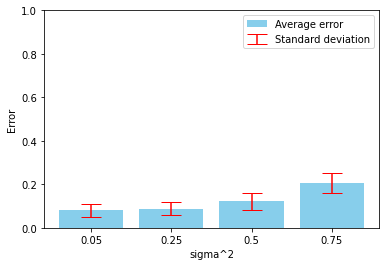

In [ ]:
List_sigma2 = [0.05,0.25,0.5,0.75]
nbr_of_data_sets = 50
Av_errors, Standard_devs = np.zeros(len(List_sigma2)), np.zeros(len(List_sigma2))

for i,sigma in enumerate(List_sigma2):
    List_errors = []
    for m in range(nbr_of_data_sets):
        data, label = Generate_data(sigma)
        w, error_rate = Perceptron(data, label)
        List_errors.append(error_rate)
        Av_errors[i] += error_rate/nbr_of_data_sets
    Standard_devs[i] = np.sqrt(sum([(e - Av_errors[i])**2 for e in List_errors])/nbr_of_data_sets)
      
plt.bar([str(sigma) for sigma in List_sigma2], Av_errors, color = 'skyblue', label='Average error')
plt.errorbar([str(sigma) for sigma in List_sigma2], Av_errors, yerr = Standard_devs, fmt = 'none', capsize = 10, ecolor = 'red', zorder = 2, label='Standard deviation')
plt.legend()
plt.ylim(0,1)
plt.xlabel("sigma^2")
plt.ylabel("Error")

When the variance $\sigma^2$ increase, the average error and the standard deviation increase. This is coherent with the fact that the points are generated according to a Gaussian distribution that spread with its variance $\sigma^2$.

### Considering different values of flipping chanel probability 

We consider one data set with $\sigma^2 = 0.15$. A new random data set is now obtained by fipping each label $d(n)$ with probability $p$ to obtain $\tilde{d}(n)$. Considering the generated data set $\{x(n), \tilde{d}(n)\}_{n=1}^{200}$, we repeat the previous experiments for $p \in \{0\%, 5\%, 10\%, 20\%\}$
and we evaluate the error $e(p)$ and its variance $\sigma^2(p)$.

Text(0, 0.5, 'Error')

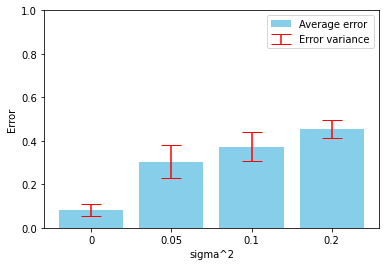

In [ ]:
sigma2, List_p = 0.15, [0,0.05,0.1,0.2]
nbr_of_data_sets = 50
Av_errors, Standard_devs = np.zeros(len(List_p)), np.zeros(len(List_p))

for i, p in enumerate(List_p):
    List_errors = []
    for m in range(nbr_of_data_sets):
        data, label = Generate_data(sigma2)
        # Flipping the labels:
        label_prime = label.copy()
        for n, dn in enumerate(label):
            if random.random() < p:
                label_prime[n] = 1 if (dn == 0) else 0        
        w, error_rate = Perceptron(data, label_prime)
        List_errors.append(error_rate)
        Av_errors[i] += error_rate/nbr_of_data_sets
    Standard_devs[i] = np.sqrt(sum([(e - Av_errors[i])**2 for e in List_errors])/nbr_of_data_sets)
      
plt.bar([str(p) for p in List_p], Av_errors, color = 'skyblue', label='Average error')
plt.errorbar([str(p) for p in List_p], Av_errors, yerr = Standard_devs, fmt = 'none', capsize = 10, ecolor = 'red', zorder = 2, label='Error variance')
plt.legend()
plt.ylim(0,1)
plt.xlabel("sigma^2")
plt.ylabel("Error")

The average error increase with the probability of flippling the label when this probability is less than $20\%$. We can assume that the average error is symmetric around $p=50\%$ because if we flip all the labels, it does not create any error (just a change in how we define the label).



## Real data

In this section, we use the "Iris flower" data set. 

First, we visualize the first two features of the training set which are sepal length and sepal width

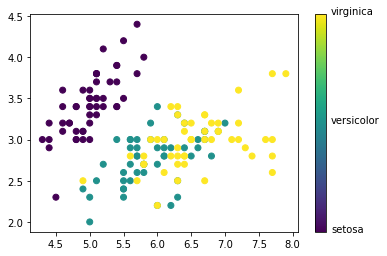

In [ ]:
df=datasets.load_iris()
dataq1 = df.data[:,:2]
dataq1=np.asarray(dataq1,dtype=np.float64)

labelq1 = df.target
labelq1 = np.asarray(labelq1,dtype=np.float64)



classesq1=df.target_names
classesq1=np.asarray(classesq1)


colormap = plt.scatter(dataq1[:,0],dataq1[:,1],c=labelq1)
colorbar = plt.colorbar()

colorbar.set_ticks(list())
for i,label in enumerate(['setosa','versicolor','virginica']):
  colorbar.ax.text(3,i,label)

No we consider only the data set containing two classes: setosa and versicolor.

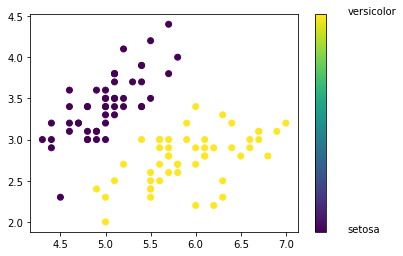

In [ ]:
df=datasets.load_iris()
newdata = df.data[0:100,:2]
data=np.asarray(data,dtype=np.float64)


newlabel = df.target[0:100]
newlabel = np.asarray(newlabel,dtype=np.float64)

newclasses=df.target_names
newclasses=np.asarray(newclasses)


colormap = plt.scatter(newdata[:,0],newdata[:,1],c=newlabel)
colorbar = plt.colorbar()

colorbar.set_ticks(list())
for i,label in enumerate(['setosa','versicolor']):
  colorbar.ax.text(3,i,label)


We train our perceptron with this data. First we suffle the data and the label (each label must fit the good data). Then we separate the training data ($80\%$ of the data) and the test data ($20\%$ data left).

In [ ]:
C = list(zip(newdata, newlabel))
random.shuffle(C)
shuffle_data, shuffle_label = zip(*C)

data_train, label_train = np.array(shuffle_data)[:80], np.array(shuffle_label)[:80]
data_test, label_test = np.array(shuffle_data)[80:], np.array(shuffle_label)[80:]

We train our perceptron with the training data.

In [ ]:
weights, error_rate_training = Perceptron(data_train, label_train)
error_rate_test = Perceptron(data_test, label_test)[1]

print("Average Error during the training = {}".format(error_rate_training))
print("Average Error during the testing = {}".format(error_rate_test))


Average Error during the training = 0.575
Average Error during the testing = 0.3


The error on the training is superior to the error on the testing set which is coherent. However, we can decrease the error by choosing wisely the number of epochs and the learning rate of the perceptron (the hyperparameters). 

In [ ]:
weights, error_rate_training = Perceptron(data_train, label_train, learning_rate = 0.01, nbr_epochs = 50)
error_rate_test = Perceptron(data_test, label_test, learning_rate = 0.01, nbr_epochs = 50)[1]

print("Average Error during the training = {}".format(error_rate_training))
print("Average Error during the testing = {}".format(error_rate_test))

Average Error during the training = 0.07225000000000005
Average Error during the testing = 0.06600000000000004


### Decision Region

We show the decision region found by our perceptron.

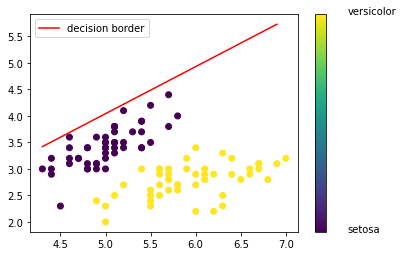

In [ ]:
colormap = plt.scatter(newdata[:,0],newdata[:,1],c=newlabel)
colorbar = plt.colorbar()

colorbar.set_ticks(list())
for i,label in enumerate(['setosa','versicolor']):
  colorbar.ax.text(3,i,label)

x = np.arange(start=np.min(newdata[:,0]),stop=np.max(newdata[:,0]),step=0.1)
y = - ( weights[1] * x + weights[0] ) / weights[2]
plt.plot(x,y,color='red', label = 'decision border')
plt.legend()
